In [ ]:
import sys
from load_data import load_csvdata


In [ ]:
ipl_auction_data = load_csvdata("../../data/raw/IPL IMB381IPL2013.csv")

In [ ]:
ipl_auction_data.head(5)

In [ ]:
list(ipl_auction_data.columns)

In [ ]:
ipl_auction_data.head(5).transpose()

In [ ]:
ipl_auction_data.shape

In [ ]:
ipl_auction_data.info()

In [ ]:
ipl_auction_data[0:5]

In [ ]:
ipl_auction_data[-5:]

In [ ]:
ipl_auction_data[:-5]

In [ ]:
ipl_auction_data['PLAYER NAME'][0:5]

In [ ]:
ipl_auction_data[['PLAYER NAME','COUNTRY']][0:5]

In [ ]:
ipl_auction_data.iloc[4:9,1:4]

In [ ]:
ipl_auction_data.iloc[4:-9,1:-4]

In [ ]:
ipl_auction_data.COUNTRY.value_counts()

In [ ]:
ipl_auction_data.COUNTRY.value_counts(normalize=True)

In [ ]:
total=sum(ipl_auction_data.COUNTRY.value_counts(normalize=True)*100)

In [ ]:

total

In [ ]:
import pandas as pd

pd.crosstab(ipl_auction_data['COUNTRY'], ipl_auction_data['PLAYING ROLE'])

In [ ]:
ipl_auction_data.head(5)

In [ ]:
ipl_auction_data[['PLAYER NAME', 'COUNTRY', 'PLAYING ROLE','SOLD PRICE']].sort_values(by='SOLD PRICE', ascending=False)

In [ ]:
ipl_auction_data['PREMIUM'] = ipl_auction_data['SOLD PRICE'] - ipl_auction_data['BASE PRICE']
ipl_auction_data.head(5)

In [ ]:
ipl_auction_data[['PLAYER NAME', 'COUNTRY', 'PLAYING ROLE','PREMIUM']].sort_values(by='PREMIUM', ascending=False)[0:5]

In [ ]:
import matplotlib.pyplot as plt
ipl_auction_data.groupby('AGE')['SOLD PRICE'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title='Average Sold Price by Age')

In [ ]:
ipl_auction_data.head(5)

In [ ]:
ipl_auction_data.groupby('AGE')['SOLD PRICE'].mean()

In [ ]:
ipl_auction_data.groupby('AGE')['SOLD PRICE'].mean().reset_index()

In [ ]:
sold_price_by_age = ipl_auction_data.groupby('AGE')['SOLD PRICE'].mean().reset_index()
sold_price_by_age_role= ipl_auction_data.groupby(['AGE', 'PLAYING ROLE'])['SOLD PRICE'].mean().reset_index()

In [ ]:
s=ipl_auction_data.groupby('AGE')['SOLD PRICE']

In [ ]:
s

In [ ]:
s.head()

In [ ]:
s.describe()

In [ ]:
soldprice_compare = sold_price_by_age.merge(sold_price_by_age_role, on ='AGE' ,how='outer', suffixes=('_by_age', '_by_role'))
soldprice_compare

In [ ]:
soldprice_compare['Change']= soldprice_compare.apply(lambda x: x['SOLD PRICE_by_role'] - x['SOLD PRICE_by_age'], axis=1)
soldprice_compare.sort_values(by='Change', ascending=False)

In [ ]:
soldprice_compare['Change']= soldprice_compare.apply(lambda x: (x['SOLD PRICE_by_role'] - x['SOLD PRICE_by_age'])/x['SOLD PRICE_by_age'], axis=1)

In [ ]:
soldprice_compare

In [ ]:
ipl_auction_data[ipl_auction_data['SIXERS']>80][['PLAYER NAME','SIXERS']]

In [ ]:
ipl_auction_data.drop('Sl.NO.', axis=1, inplace=True)

In [ ]:
ipl_auction_data.info()

In [ ]:
autos= pd.read_csv("../../data/raw/auto-mpg.data", sep ='\s+',header=None)
autos.head(5)

In [ ]:
autos.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
autos.head(5)

In [ ]:
autos.info()

In [ ]:
autos['horsepower'] = pd.to_numeric(autos['horsepower'], errors='coerce'    )

In [ ]:
autos.info()

In [ ]:
autos[autos['horsepower'] == '?']

In [ ]:
autos.info()

In [ ]:
autos[autos.horsepower.isnull()]


In [ ]:
autos=autos.dropna(subset=['horsepower'])

In [ ]:
autos[autos.horsepower.isnull()]

In [ ]:
import seaborn as sn
%matplotlib inline

sn.barplot(x='AGE', y='SOLD PRICE', data=sold_price_by_age, palette='viridis')

In [ ]:
sn.barplot(x='AGE', y='SOLD PRICE', hue='PLAYING ROLE', data=sold_price_by_age_role, palette='viridis')

In [ ]:
plt.hist(ipl_auction_data['SOLD PRICE'], bins=20, color='green', edgecolor='black')

In [ ]:

sn.displot(ipl_auction_data['SOLD PRICE'])

In [ ]:
box= sn.boxplot(ipl_auction_data['SOLD PRICE'], color='green')

In [ ]:
box= plt.boxplot(ipl_auction_data['SOLD PRICE'])

In [ ]:
[item.get_ydata()[0] for item in box['whiskers']]

In [ ]:
[item.get_ydata()[0] for item in box['caps']]

In [ ]:
[item.get_ydata()[0] for item in box['medians']]

In [59]:
ipl_auction_data[ipl_auction_data['SOLD PRICE']>1350000][['PLAYER NAME', 'COUNTRY', 'PLAYING ROLE', 'SOLD PRICE']]

,PLAYER NAME,COUNTRY,PLAYING ROLE,SOLD PRICE
15,"Dhoni, MS",IND,W. Keeper,1500000
23,"Flintoff, A",ENG,Allrounder,1550000
50,"Kohli, V",IND,Batsman,1800000
83,"Pietersen, KP",ENG,Batsman,1550000
93,"Sehwag, V",IND,Batsman,1800000
111,"Tendulkar, SR",IND,Batsman,1800000
113,"Tiwary, SS",IND,Batsman,1600000
127,Yuvraj Singh,IND,Batsman,1800000


C:\Users\Rajne\AppData\Local\Temp\ipykernel_3772\4144169885.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(ipl_auction_data[ipl_auction_data['CAPTAINCY EXP']==1][['SOLD PRICE']], color='y',label='Captaincy Experience')


<Axes: ylabel='Density'>

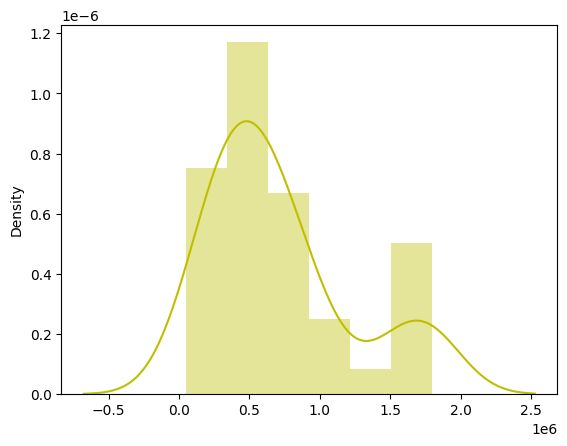

In [69]:
sn.distplot(ipl_auction_data[ipl_auction_data['CAPTAINCY EXP']==1][['SOLD PRICE']], color='y',label='Captaincy Experience')

C:\Users\Rajne\AppData\Local\Temp\ipykernel_3772\546843054.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(ipl_auction_data[ipl_auction_data['CAPTAINCY EXP']==0][['SOLD PRICE']], color='r',label='Captaincy Experience')


<Axes: ylabel='Density'>

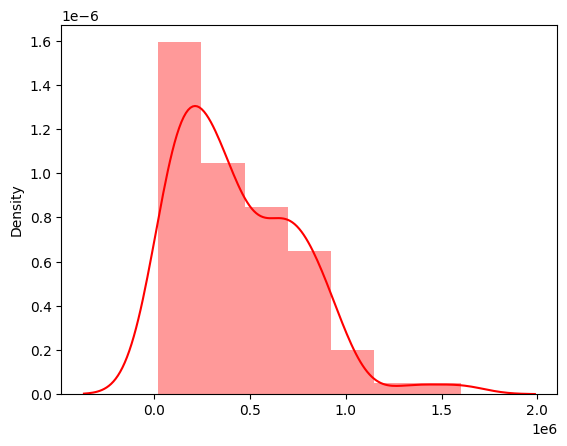

In [70]:
sn.distplot(ipl_auction_data[ipl_auction_data['CAPTAINCY EXP']==0][['SOLD PRICE']], color='r',label='Captaincy Experience')

C:\Users\Rajne\AppData\Local\Temp\ipykernel_3772\1450183239.py:1: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend();


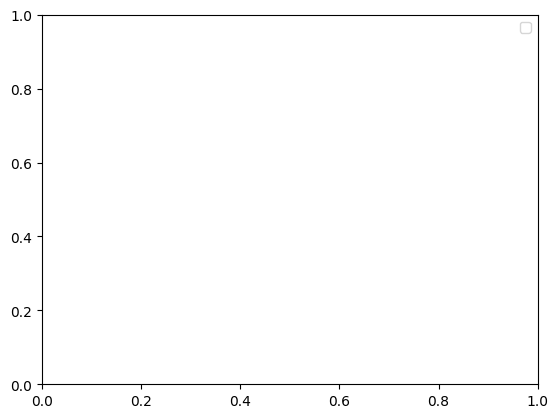

In [72]:
plt.legend();

C:\Users\Rajne\AppData\Local\Temp\ipykernel_3772\2000320564.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(ipl_auction_data[ipl_auction_data['CAPTAINCY EXP']==1][['SOLD PRICE']], color='y',label='Captaincy Experience')
C:\Users\Rajne\AppData\Local\Temp\ipykernel_3772\2000320564.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2

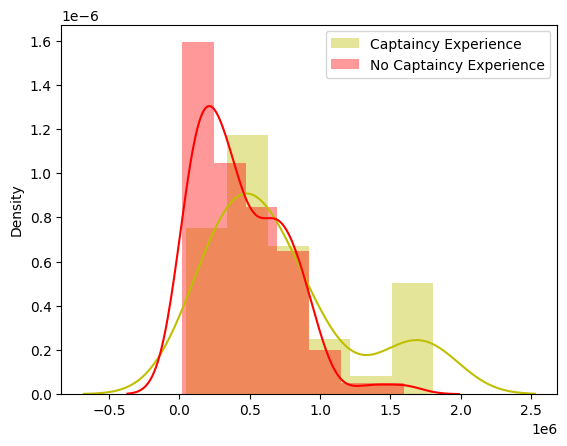

In [74]:
sn.distplot(ipl_auction_data[ipl_auction_data['CAPTAINCY EXP']==1][['SOLD PRICE']], color='y',label='Captaincy Experience')
sn.distplot(ipl_auction_data[ipl_auction_data['CAPTAINCY EXP']==0][['SOLD PRICE']], color='r',label='No Captaincy Experience')
plt.legend();

C:\Users\Rajne\AppData\Local\Temp\ipykernel_3772\2989125776.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x='PLAYING ROLE', y='SOLD PRICE', data=ipl_auction_data, palette='viridis')


<Axes: xlabel='PLAYING ROLE', ylabel='SOLD PRICE'>

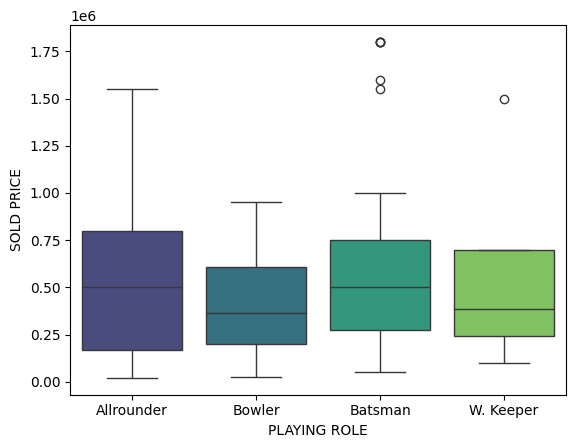

In [75]:
sn.boxplot(x='PLAYING ROLE', y='SOLD PRICE', data=ipl_auction_data, palette='viridis')

In [79]:
ipl_batsman = ipl_auction_data[ipl_auction_data['PLAYING ROLE'] == 'Batsman']
ipl_batsman.head(5)

,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,...,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE,PREMIUM
4,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,0,...,28,0,0,0.0,0.00,0.0,2011,100000,800000,700000
5,"Bailey, GJ",2,AUS,CSK,Batsman,0,0,172,72.26,0,...,0,0,0,0.0,0.00,0.0,2009,50000,50000,0
11,"Chanderpaul, S",3,WI,RCB,Batsman,9918,9,8778,70.74,14,...,0,0,0,0.0,0.00,0.0,2008,200000,200000,0
14,"Dhawan, S",2,IND,MI+,Batsman,0,0,69,56.09,0,...,36,66,4,16.5,8.25,12.0,2011,100000,300000,200000
18,"Dravid, RS",3,IND,RCB+,Batsman,13288,1,10889,71.24,4,...,23,0,0,0.0,0.00,0.0,2011,400000,500000,100000


In [78]:
ipl_auction_data.head(5)

,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,...,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE,PREMIUM
0,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,0,...,0,307,15,20.47,8.90,13.93,2009,50000,50000,0
1,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,185,...,0,29,0,0.00,14.50,0.00,2008,50000,50000,0
2,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,288,...,5,1059,29,36.52,8.81,24.90,2008,200000,350000,150000
3,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,51,...,0,1125,49,22.96,6.23,22.14,2011,100000,850000,750000
4,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,0,...,28,0,0,0.00,0.00,0.00,2011,100000,800000,700000


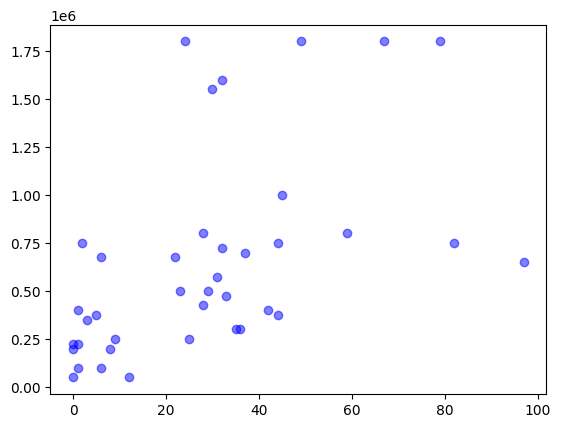

In [82]:
plt.scatter(x=ipl_batsman.SIXERS, y=ipl_batsman['SOLD PRICE'], color='blue', alpha=0.5)

<Axes: xlabel='SIXERS', ylabel='SOLD PRICE'>

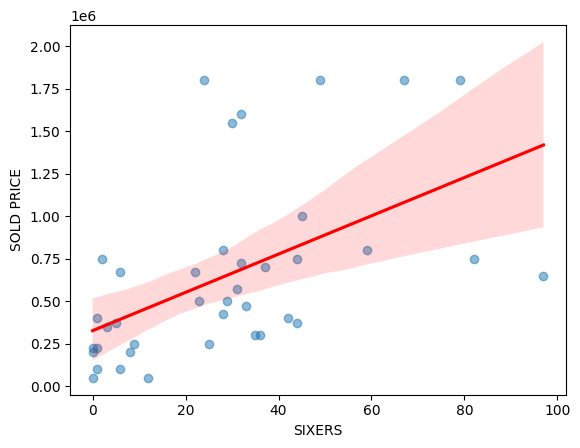

In [84]:
sn.regplot(x='SIXERS', y='SOLD PRICE', data=ipl_batsman, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

In [88]:
ipl_auction_data[ipl_auction_data['SIXERS'] > 50][['PLAYER NAME', 'SOLD PRICE', 'SIXERS']].sort_values(by='SIXERS', ascending=False)

,PLAYER NAME,SOLD PRICE,SIXERS
26,"Gayle, CH",800000,129
88,"Raina, SK",650000,97
28,"Gilchrist, AC",700000,86
97,"Sharma, RG",750000,82
82,"Pathan, YK",475000,81
93,"Sehwag, V",1800000,79
127,Yuvraj Singh,1800000,67
15,"Dhoni, MS",1500000,64
116,"Uthappa, RV",800000,59


d:\Rajneesh\Study Material\BITS_MS_AI\Gitrepo\ml-using-python\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
d:\Rajneesh\Study Material\BITS_MS_AI\Gitrepo\ml-using-python\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
d:\Rajneesh\Study Material\BITS_MS_AI\Gitrepo\ml-using-python\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
d:\Rajneesh\Study Material\BITS_MS_AI\Gitrepo\ml-using-python\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)


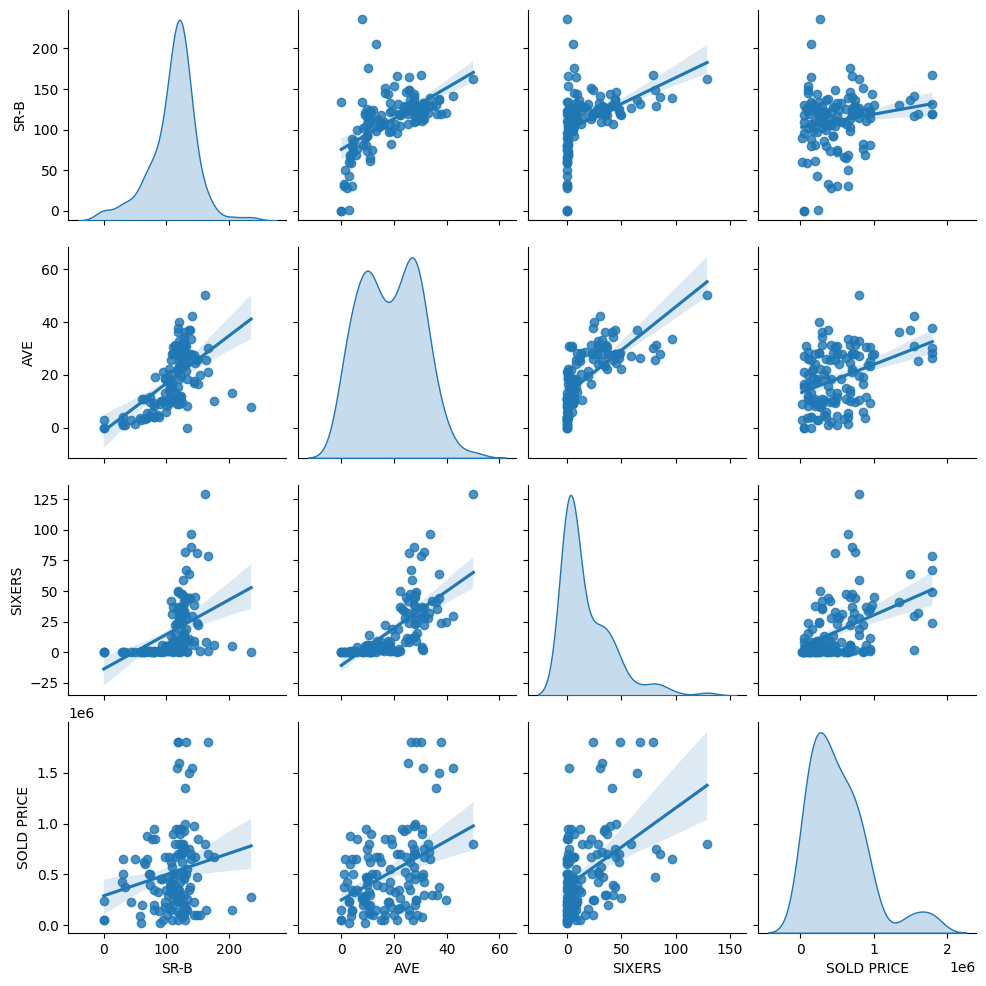

In [89]:
influential_features=['SR-B','AVE','SIXERS','SOLD PRICE']
sn.pairplot(ipl_auction_data[influential_features], kind='reg', diag_kind='kde', palette='viridis')

In [91]:
ipl_corr=ipl_auction_data[influential_features].corr()

<Axes: >

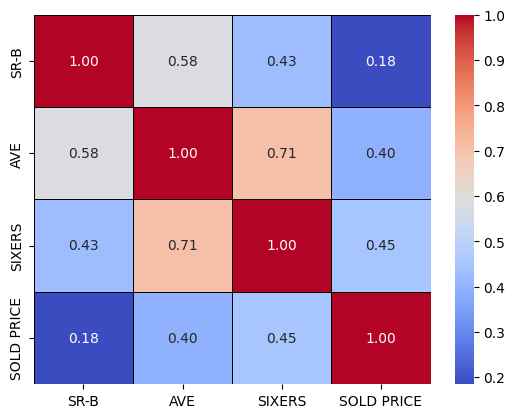

In [95]:
sn.heatmap(ipl_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')